In [1]:
# Import the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df_original = pd.read_csv("Student Depression Dataset.csv")

#  Display the first 5 rows of the data
print("First 5 rows of the dataset:")
display(df_original.head())

# Display dataset summary
print("Dataset info:")
df_original.info()

First 5 rows of the dataset:


id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

**Step 06 - Handling class imbalance**

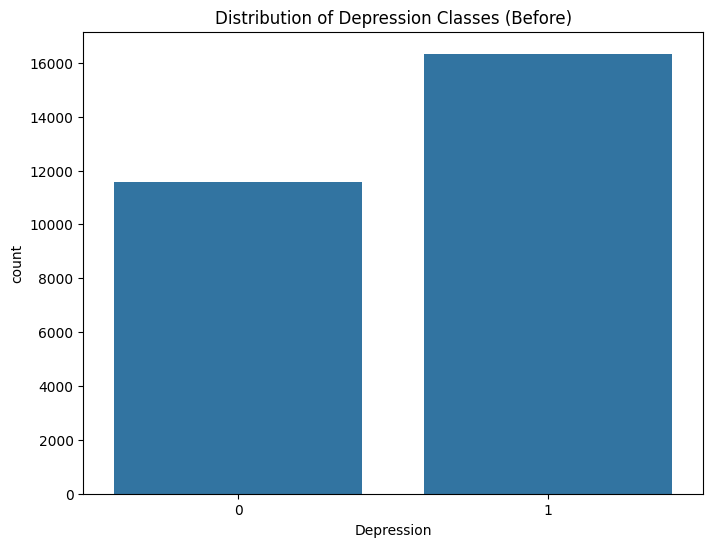

Value counts for Depression (Before):
Depression
1    16336
0    11565
Name: count, dtype: int64


In [3]:
# plot for depression
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='Depression')
plt.title('Distribution of Depression Classes (Before)')
plt.show()

# Show the counts
print("Value counts for Depression (Before):")
print(df_original['Depression'].value_counts())

In [4]:
from sklearn.utils import resample

# Find majority and minority classes
majority_class_count = df_original['Depression'].value_counts().max()
majority_class_label = df_original['Depression'].value_counts().idxmax()
minority_class_label = df_original['Depression'].value_counts().idxmin()

# Split data into majority and minority
df_majority = df_original[df_original['Depression'] == majority_class_label]
df_minority = df_original[df_original['Depression'] == minority_class_label]


df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=majority_class_count,
                                 random_state=42)

# Combine both to make balanced dataset
df_balanced = pd.concat([df_majority, df_minority_oversampled])

print("Minority class has been over-sampled.")
print("New class distribution:")
print(df_balanced['Depression'].value_counts())

Minority class has been over-sampled.
New class distribution:
Depression
1    16336
0    16336
Name: count, dtype: int64


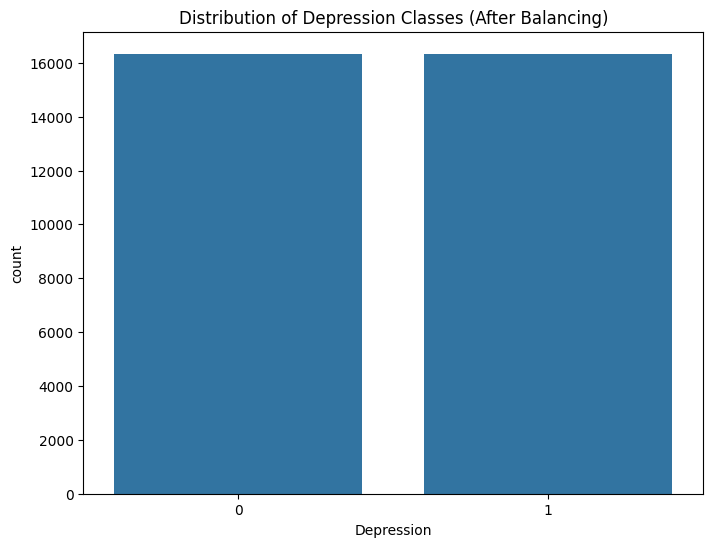

In [5]:
# plot for depression
plt.figure(figsize=(8, 6))
sns.countplot(data=df_balanced, x='Depression')
plt.title('Distribution of Depression Classes (After Balancing)')
plt.show()